In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

mouse_data_df.head()



,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
clinical_data_complete = pd.merge(clinical_trial_df, mouse_data_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_complete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
avg_tumor_vol = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# avg_tumor_vol = clinical_data_complete.groupby(["Drug"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
avg_tumor_vol = pd.DataFrame(avg_tumor_vol)
# Preview DataFrame
avg_tumor_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [8]:
# reset the DF:
avg_tumor_vol = avg_tumor_vol.reset_index()
avg_tumor_vol

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vol_sem = pd.DataFrame(tumor_vol_sem)

# Preview DataFrame
tumor_vol_sem.reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [10]:
tumor_vol_sem.head(35)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
Ketapril  0                    0.000000
          5                    0.264819
          10                   0.357421
          15                   0.580268
          20                   0.726484

In [11]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_vol = avg_tumor_vol.reset_index()
avg_tumor_vol_pivot = avg_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

avg_tumor_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
tumor_vol_sem = tumor_vol_sem.reset_index()
tumor_vol_pivot_sem = tumor_vol_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked

tumor_vol_pivot_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


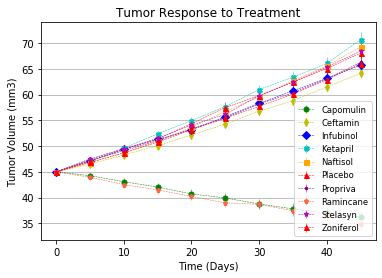

In [13]:
# Generate the Plot (with Error Bars)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Capomulin"], yerr=tumor_vol_pivot_sem["Capomulin"], 
             color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Ceftamin"], yerr=tumor_vol_pivot_sem["Ceftamin"],
             color="y", marker="d", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Infubinol"], yerr=tumor_vol_pivot_sem["Infubinol"],
             color="b", marker="D", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Ketapril"], yerr=tumor_vol_pivot_sem["Ketapril"],
             color="c", marker="X", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Naftisol"], yerr=tumor_vol_pivot_sem["Naftisol"],
             color="orange", marker="s", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Placebo"], yerr=tumor_vol_pivot_sem["Placebo"], 
             color="r", marker="^", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Propriva"], yerr=tumor_vol_pivot_sem["Propriva"], 
             color="purple", marker=".", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Ramicane"], yerr=tumor_vol_pivot_sem["Ramicane"], 
             color="tomato", marker="p", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Stelasyn"], yerr=tumor_vol_pivot_sem["Stelasyn"], 
             color="m", marker="*", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(avg_tumor_vol_pivot.index, avg_tumor_vol_pivot["Zoniferol"], yerr=tumor_vol_pivot_sem["Zoniferol"], 
             color="r", marker="^", markersize=5, linestyle="dashed", linewidth=0.5)


# Save the Figure
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",  "Placebo", "Propriva", "Ramincane", 
            "Stelasyn", "Zoniferol"], loc="best", fontsize="small", fancybox=True)

In [14]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_mean = pd.DataFrame(metastatic_mean)

# Preview DataFrame
met_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
met_sem = pd.DataFrame(metastatic_sem)
# Preview DataFrame
met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [17]:
# Minor Data Munging to Re-Format the Data Frames
met_mean = met_mean.reset_index()
met_mean_pivot = met_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sem = met_sem.reset_index()
met_sem_pivot = met_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


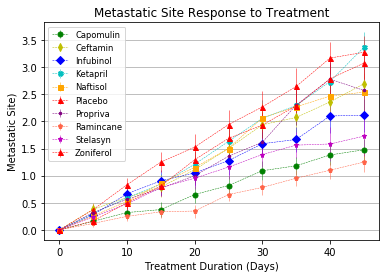

In [18]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Capomulin"], yerr=met_sem_pivot["Capomulin"], 
             color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Ceftamin"], yerr=met_sem_pivot["Ceftamin"],
             color="y", marker="d", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Infubinol"], yerr=met_sem_pivot["Infubinol"],
             color="b", marker="D", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Ketapril"], yerr=met_sem_pivot["Ketapril"],
             color="c", marker="X", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Naftisol"], yerr=met_sem_pivot["Naftisol"],
             color="orange", marker="s", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Placebo"], yerr=met_sem_pivot["Placebo"], 
             color="r", marker="^", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Propriva"], yerr=met_sem_pivot["Propriva"], 
             color="purple", marker=".", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Ramicane"], yerr=met_sem_pivot["Ramicane"], 
             color="tomato", marker="p", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Stelasyn"], yerr=met_sem_pivot["Stelasyn"], 
             color="m", marker="*", markersize=5, linestyle="dashed", linewidth=0.5)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Zoniferol"], yerr=met_sem_pivot["Zoniferol"], 
             color="r", marker="^", markersize=5, linestyle="dashed", linewidth=0.5)


# Save the Figure
plt.title("Metastatic Site Response to Treatment")
plt.ylabel("Metastatic Site)")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",  "Placebo", "Propriva", "Ramincane", 
            "Stelasyn", "Zoniferol"], loc="best", fontsize="small", fancybox=True)

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Metastatic Sites"]
survival_count
# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})
# Preview DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [20]:
# Minor Data Munging to Re-Format the Data Frames

survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]


# Preview the Data Frame

survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


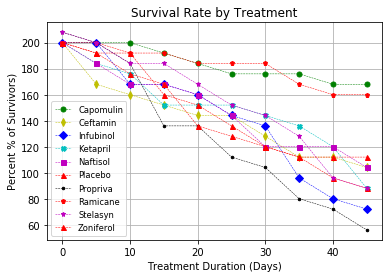

In [27]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"]/12.5, "go", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ceftamin"]/12.5, "yd", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"]/12.5, "bD", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"]/12.5, "cX", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Naftisol"]/12.5, "ms", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"]/12.5, "r^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Propriva"]/12.5, "k.", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ramicane"]/12.5, "rp", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Stelasyn"]/12.5, "m*", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Zoniferol"]/12.5, "r^", linestyle="dashed", markersize=5, linewidth=0.50)


# Save the Figure
plt.title("Survival Rate by Treatment")
plt.ylabel("Percent % of Survivors)")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",  "Placebo", "Propriva", "Ramicane", 
            "Stelasyn", "Zoniferol"], loc="best", fontsize="small", fancybox=True)


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
tumor_pct_change = 100* (avg_tumor_vol_pivot.iloc[-1] - avg_tumor_vol_pivot.iloc[0])/ avg_tumor_vol_pivot.iloc[0]
tumor_pct_change_sem =  100 * (tumor_vol_pivot_sem.iloc[-1] - tumor_vol_pivot_sem.iloc[0])/tumor_vol_pivot_sem.iloc[0]

# Display the data to confirm
tumor_pct_change_sem

Drug
Capomulin    inf
Ceftamin     inf
Infubinol    inf
Ketapril     inf
Naftisol     inf
Placebo      inf
Propriva     inf
Ramicane     inf
Stelasyn     inf
Zoniferol    inf
dtype: float64

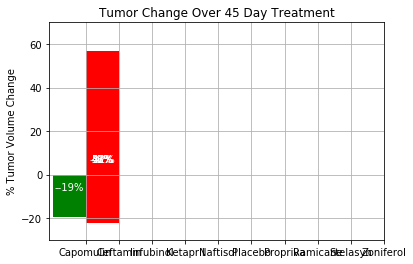

In [31]:
# Store all Relevant Percent Changes into a Tuple
pct_change = (tumor_pct_change["Capomulin"],
             tumor_pct_change["Ceftamin"],
             tumor_pct_change["Infubinol"],
             tumor_pct_change["Ketapril"],
             tumor_pct_change["Naftisol"],
             tumor_pct_change["Placebo"],
             tumor_pct_change["Propriva"],
             tumor_pct_change["Ramicane"],
             tumor_pct_change["Stelasyn"],
             tumor_pct_change["Zoniferol"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_change))
width = 1
rectsPass = ax.bar(ind[0], pct_change[0], width, color="green")
rectsFail = ax.bar(ind[1], pct_change[1:], width, color="red")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind +0.5)
ax.set_xticklabels(("Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",  "Placebo", "Propriva", 
                    "Ramicane", "Stelasyn", "Zoniferol"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/ 2., 3, "%d%%" % int(height), 
                ha="center", va="bottom", color="white")

# Call functions to implement the function calls
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8, "-%d%%" % int(height), 
                ha="center", va="bottom", color="white")

# Save the Figure
autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)